In [1]:
!pip3 install torch torchvision

In [2]:
!ls #실제 배쉬에서 사용가능한거 나옴. 이게 매직코드. 

sample_data


In [0]:
import torch

In [6]:
torch.cuda.is_available() #cpu 잘 돌아가는지보는코드

True

In [0]:
a=torch.FloatTensor([[2,3,4,5]]) #토치 생성(어레이와 같은 방식)

In [9]:
a

tensor([[2., 3., 4., 5.]])

In [0]:
# view는 넌파이의 reshape와 같음

In [0]:
import numpy as np

In [0]:
b=np.array([[3,4,5,6]]) #넌파이와 같이 비교할게요

In [14]:
b.shape

(1, 4)

In [40]:
b.reshape(2,2)

array([[3, 4],
       [5, 6]])

In [16]:
a.view(2,2)

tensor([[2., 3.],
        [4., 5.]])

In [17]:
a.view(2,-1).flatten() #플랫된 벡터로  펼쳐짐

tensor([2., 3., 4., 5.])

In [0]:
# 스퀴즈 언스퀴즈

In [21]:
a.unsqueeze(1).shape #언스퀴즈. shape은 1,4인데 현재 1,1,4로 뭔가 끼어들어갔음

torch.Size([1, 1, 4])

In [20]:
a.shape

torch.Size([1, 4])

In [22]:
a.unsqueeze(1).squeeze(0)


tensor([[2., 3., 4., 5.]])

In [23]:
a.unsqueeze(1).squeeze(0).shape #이렇게 다시 없앨 수 있음

torch.Size([1, 4])

In [24]:
#size통해 첫번째 디멘션의 크기가 몇인지 알 수 있음
a.size(0)

1

In [0]:
# torch.cuda _중요한 메소드 잇어서 볼게요

In [27]:
#cpu 사용 여부 체크
print(torch.cuda.is_available())
# 만일 사용이 가능하다면, 이 컴퓨터의 지피유 몇개가 가능한지
print(torch.cuda.device_count())

True
1


In [0]:
# torch.cuda 플롯 팬서
# 지피유에 올라간 텐서생성
##################실습################3
device=torch.device('cuda')

In [0]:
a=a.to(device)

In [30]:
a

tensor([[2., 3., 4., 5.]], device='cuda:0')

In [0]:
# !nvidia-smi실제 지피유 얼마나 사용하는지 확인

In [0]:
a=torch.cuda.FloatTensor(1024,1024,256) #256메가바이트

In [39]:
!nvidia-smi  #실제 지피유 얼마나 사용하는지 확인

Mon Jul 29 05:33:08 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    56W / 149W |   5174MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
# 리니어 구현
linear=torch.nn.Linear(4,1) #input:4, output:1

In [0]:
x=torch.FloatTensor([0,1,1,1])

In [44]:
# 리이어에 함수 형식으로 넣으면, 값이 이렇게 나와요. (tensor([-0.3247], grad_fn=<AddBackward0>))
# 리니어 자체가 함수라서 linear. (점) 클릭하면 사용할 수 있는 값들이 나옴
linear(x)

tensor([-0.3247], grad_fn=<AddBackward0>)

In [0]:
#torch.nn.functional. 시그모이드나 소프트맥스 등. 액티베이션으로 시그모이드 및 소프트맥스 쓸 수 있는데 그게 여기에 있어요. 함수가 워낙 많아서 docs 볼게요



In [0]:
import torch.nn.functional as F #귀찮으니까 그냥 F로 부르게해

In [46]:
F.sigmoid(linear(x))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


tensor([0.4195], grad_fn=<SigmoidBackward>)

In [47]:
F.tanh(linear(x))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


tensor([-0.3137], grad_fn=<TanhBackward>)

In [48]:
F.sigmoid(linear(x))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


tensor([0.4195], grad_fn=<SigmoidBackward>)

In [49]:
torch.sigmoid(linear(x))

tensor([0.4195], grad_fn=<SigmoidBackward>)

In [0]:
# ADAM- 90프로가 사용함. (option)그리고 여기서 옵션 

####MODEL은 클래스 형식으로 정의
- n드. 클래스 정의 할 때 이 함수가 호출 되는 식으로 필수적으로 구현되어야 함. 
-  self.(점)으로 하고


- relu라는 액티베이션을 통해 계산. 
- forward 함수도 필수적으로 구현이 되어야 하며 이건 내가 사용하는 학습되어야 할 데이터 대한 것
- 즉 ** __init__ 및 forward는 모델에서 꼭 구현이 되어야 함


#### Training Model
- 인풋 디맨젼 8, 히든 디맨전 128 지정하여 모델 생성 (단 초반에는 리니어에 있는 가중치 랜덤 초기화)
- model.parameters()
- lr: 러닝 메이트 (10의 -3승을 넣게 되어요)
- criterion: MSELose를여기에서 하고
- model.train() : 학습모드라고 말해주고
- epochs : 

- 포문: 여러번 학습시켜요(매 학습마다 데이터 순서는 랜덤하게 바꿔줘야해요 ** 딥러닝 성능이 좋다보니 저 순서를 고정해버리면 순서 자체를 외울 수 있음. 따라서 랜덤하게 바꾸며 학습하게 됨)

- batch: 예,20개씩 한번에 넣어서 학습하는 식. 하나씩 넣게 되면 너무 속도가 느려서.
    - 각각에 대해 평균을 내서 그거에 대한 프로포게이션
    - gpu 메모리에 복사를 하게 되면 20장에 대해 모델에 넣게 되고, 
    
 - 로스 함수 계산; 20개, 타겟 20개에 대한 민ㅅ퀘어 계산을 하래. 그래서 백워드를 쭉 하면 레이어1,2,3별로 계싼이 되어요. 백워드하면 그ㅐ디언튿르이 각각 생김
 
 - 옵티마이저.스탭) ㄱㄱ각 레이어 들이 각각 그래디언트를 가지고 업데이트를 하게 됩니다. 
 
 - 이 과정 반복하면 모델의 성능이 조아져요
 - 옵티마이점 제로 그래드는
    - 백워드 한번하면 그래디언트 계싼되는데 또 백워드를 하면 그래디언트가 플러스가 됨. 이전 계산에 지금 계산 추가되어 누적되니, 이전 계싼은 날려버리곘다는 뜻.
    
    
    
    #### Testing Model
    - 우선 그래디언트 계산할 필요 없음
        - torch.no_grad로 계산 안하겠다 하여 지피유 메모리 적게 쓰게 함
        - model. eval() : 평가 모드로 하겠다. 
            - 나중에 드랍아웃 및 기타 랜더마이즈한 기법 적용시 학습에서 사용하다가 평가할때는 랜덤하게 사용하겠다 그렇게 고정하겠따는건데 일단 무시(''//'')
         - 아까는 MSE에러였는데 이제는 loss . 
           - 즉 |0.8-1| 로 0.2만큼 차이 있는거 직관적으로 알 수 있게끔. 
           - 다 더하고 평균내서 토탈 로스로 출력한다고 보시면 됩니다.n.Module: 최상위 부모 클래스
- __init__ : 스페셜 메소




#### LOAD and Save Mode
- torch.save()
    - 이 함수로 저장
    - 모델 자체를 넣지 않고, 모델의 상태를 불러와서 저장하게 됨
    - torh.save(the_model.state_dict(), PATH)
        - 상태) 이런 모델의 상태값 저장을 하고 모델 자체를 저장해도 되나 권장하는 것은 상태저장
        - 그래야 변형시 유연함
- 

- the_model+THeModelClass(*args, **kwargs)
- the_model.load_state_dict(torch.load(PATH))

    - 파일에서 모델을 불러오는 경우.
    - 클래스로 정의했기에 실제 객체로 만들어줘야해요. 
    - 만들지 않고 하면 모델이 없는 채에서 함수 사용하는 식이라 에러 생길 수 있음

In [0]:
# california housing 실습 
## https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [0]:
from sklearn.datasets import fetch_california_housing
# sklearn.datasets.fetch_california_housing(data_home=None, download_if_missing=True, return_X_y=False)[source]

In [53]:
data=fetch_california_housing() #datahome은 어느 경로 다운받을지, return X,y는 피쳐만 받을지 아니면 다른 형태로 받을지

In [54]:
data.data #feature_naems, target:집값

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [55]:
data.data.shape #데이터 20640개, 피쳐 8개

(20640, 8)

In [57]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [58]:
data.target #0.15~5까지 범위가 있는거 알 수 있어요

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [0]:
# 집값 분포를 간단하게 히스토그램으로 시각화
## 박사님은 관련 히스토그램 코드 복붙하고 상황에 맞게 교정하셨음

(array([0.00449531, 0.0069927 , 0.03046819, 0.12736701, 0.26871942,
        0.33764745, 0.27271525, 0.40108122, 0.44004054, 0.35263181,
        0.40557653, 0.35712711, 0.41756401, 0.40707496, 0.46001968,
        0.47949934, 0.39259009, 0.40807392, 0.35113337, 0.25223663,
        0.30967666, 0.33015528, 0.28869856, 0.25373507, 0.2157747 ,
        0.21927105, 0.23125854, 0.16532738, 0.15983311, 0.10788735,
        0.11188318, 0.11587901, 0.12237223, 0.12586858, 0.14285085,
        0.09639935, 0.07991656, 0.07442229, 0.05843898, 0.06643064,
        0.05194576, 0.04944837, 0.03995828, 0.04495306, 0.05294472,
        0.03296558, 0.02447445, 0.0254734 , 0.02347549, 0.51446283]),
 array([0.14999  , 0.2469904, 0.3439908, 0.4409912, 0.5379916, 0.634992 ,
        0.7319924, 0.8289928, 0.9259932, 1.0229936, 1.119994 , 1.2169944,
        1.3139948, 1.4109952, 1.5079956, 1.604996 , 1.7019964, 1.7989968,
        1.8959972, 1.9929976, 2.089998 , 2.1869984, 2.2839988, 2.3809992,
        2.4779996, 2.5

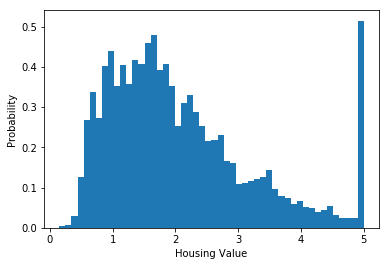

In [61]:
import numpy as np
import matplotlib.pyplot as plt

#xlabel은 아래에 있는 타이틀
plt.xlabel('Housing Value')
plt.ylabel('Probability')
#plt.xlim
#plt.ylim
#grid:격자 
#plt.show()
plt.hist(data.target, 50, density=True, )

In [0]:
# data 2만개있지만 이거 다 안 쓰고, 그 중 일부는 검증용으로 쓸거에요. 랜덤하게 스플릿 해봐요

In [204]:
from sklearn.model_selection import train_test_split
# sklearn.model_selection
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
train_test_split(data.data, data.target, test_size=0.2)
## 2개 인풋하면 4개 아웃풋(엑스 트레인, 엑스 테스트, 와이 트레인, 와이 테스트)

[array([[   4.9904    ,   36.        ,    6.00436681, ...,    3.02620087,
           33.86      , -118.11      ],
        [   1.372     ,   47.        ,    4.03067485, ...,    3.54294479,
           36.73      , -119.81      ],
        [   4.625     ,   19.        ,    6.15570934, ...,    2.48961938,
           33.01      , -117.05      ],
        ...,
        [   3.1563    ,   29.        ,    3.41614124, ...,    1.56116015,
           34.02      , -118.49      ],
        [   4.0714    ,   42.        ,    5.84350133, ...,    2.68435013,
           34.19      , -118.13      ],
        [   1.4828    ,   24.        ,    4.24832215, ...,    3.63422819,
           32.67      , -115.49      ]]),
 array([[   3.5391    ,   27.        ,    5.83526012, ...,    2.97398844,
           34.9       , -120.43      ],
        [   4.4637    ,   31.        ,    5.88735632, ...,    2.76781609,
           34.11      , -117.62      ],
        [   8.3275    ,    4.        ,    7.875     , ...,    3.14732143,

In [0]:
# 우리 0~1사이로 변형해보아요

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2)

In [0]:
#X_train.shape #16512는 학습 테스트용, 8개는 검증용

In [0]:
#X_test # 0.15~5까지 집값있었으니 정규화 해볼게요

In [0]:
min_, max_ =y_train.min(), y_train.max()# 가장 작고 큰 값을 여기에 넣어 민맥스 정규화 할거야
# 민맥스- 0~1사이로 만들어준다. 
 # Y_train 실제 집값. 이거 타겟이니까 이거에 대해 해볼게요
y_train=(y_train - min_)/ (max_ - min_)


In [0]:
# 피쳐 별로 정규화 해볼게요. 

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
#std_scaler= StandardScaler()

In [209]:
#std_scaler.fit(X_train)#이거로 핏하고 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
#std_scaler.mean_ #각 피쳐별로 평균 볼 수 있고


In [0]:
# 근데 이거 말고 그냥 핏 트랜스폼이 있으니 그거로 하면 됨

In [0]:
std_scaler=StandardScaler()
X_train=std_scaler.fit_transform(X_train)
X_test=std_scaler.transform(X_test) #프렌스폼이야 핏프렌스폼 아니고. 뒤에서 에러나길래 추가한 코드

In [219]:
y_test

array([2.25 , 0.551, 2.171, ..., 1.528, 3.543, 0.946])

In [0]:
## 아까 에러 나서 고친거. 
### nd array> torch로 바꿨는데 토치가 32라서 float 64로 변환을 해줘야 함. 
###

X_train, y_train=torch.from_numpy(X_train), torch.from_numpy(y_train)#어레이를 텐서로 변경
X_test, y_test= torch.from_numpy(X_test), torch.from_numpy(y_test)
X_train, y_train=X_train.float(), y_train.float()
X_test, y_test= X_test.float(), y_test.float()


y_train, y_test= y_train.view(-1,1), y_test.view(-1,1 #reshape와 같은거로 -1은 맞춰주는식

Xtrain, Xtest, Ytrain, Ytest 이해
- 만일 키를 통해 몸무게를 추측한다고 합시다
- 키에 대한 데이터 172, 180cm등은 Xtrain이고, 178일때의 결과를 얻고 싶은 Xtest라하면
- 몸무게(결과 예측)에 대한 데이터는 62, 65kg이 ytain이고, 값이 나왔어야 하는 결과값 70은 ytest
- 이때 ytest와 ytrain에 대한 차이가 loss
- 에폭: 데이터 넣고 돌리는 한 세트

In [0]:
# tensor 데이터 셋 사용합시다

In [0]:
from torch.utils.data import TensorDataset
train_dataset=TensorDataset(X_train, y_train)
test_dataset=TensorDataset(X_test, y_test)

In [0]:
# 데이터 로더를 정의하여 데ㅐ이터 셋들을 포문 돌면서 배치
#torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=False, sample=None) # 셔플_ 랜덤

In [0]:
from torch.utils.data import TensorDataset, DataLoader
train_loader=DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader= DataLoader(test_dataset, batch_size=32)

In [123]:
#X_train.float().dtype

torch.float32

In [0]:
# Xtrain, ytrain 넣었는데 

In [226]:
for batch_X, batch_y in train_loader : #매 배치마다 엑스와 와이 받을 수 있음
    print(batch_X)
    print(batch_y)
    break

tensor([[ 4.0062e-01, -1.0892e+00,  2.5016e-01, -6.0753e-02,  8.1550e-01,
          5.4675e-02,  9.9457e-01, -9.3897e-01],
        [ 9.3599e-01,  1.7753e+00,  1.4877e-01, -1.2610e-01, -5.3864e-01,
         -1.0961e-01,  9.9926e-01, -1.4384e+00],
        [-3.5210e-01,  4.2261e-01,  2.2126e-02, -1.0867e-01,  2.6973e+00,
         -3.6911e-02, -5.4813e-01,  1.6984e-01],
        [-4.1914e-01,  1.8549e+00, -4.5521e-01, -9.0607e-02,  1.2662e-03,
         -9.1524e-02,  1.0039e+00, -1.4334e+00],
        [-1.0756e+00, -8.5052e-01, -4.2245e-01, -7.1570e-02,  1.1405e+00,
          1.3301e-01,  4.2719e-01,  1.3987e-01],
        [-9.4834e-01, -9.3009e-01, -3.5639e-01, -3.3139e-01, -2.6519e-01,
         -1.2932e-01, -1.1718e+00,  1.2187e+00],
        [ 1.6799e+00, -2.9353e-01,  1.0296e+00, -2.3669e-01, -1.2978e-01,
          1.7074e-02, -8.1541e-01,  8.8407e-01],
        [-5.9291e-01,  5.0218e-01, -4.7829e-02, -6.3883e-02, -2.0404e-01,
         -5.9850e-04, -1.4019e-01,  2.7473e-01],
        [ 1.2030

In [0]:
# 모델 정의
import torch.nn as nn
class Model(nn.Module): #괄호안에는 속성으로 nn.Module
    def __init__(self, input_dim, hidden_dim): #인풋과 히든 디멘젼을 처음에 만들어 줘야함
        super(Model, self).__init__() #파이썬 문법이니 그렇구나
        self.input_dim=input_dim
        self.hidden_dim=hidden_dim
        
        self.linear1= nn.Linear(self.input_dim, self.hidden_dim)#첫 인풋 받아서 첫 히든 만드는 벡터
        self.linear2= nn.Linear(self.hidden_dim, 1)#아웃풋 레이어 벡터 만들기. 집 하나만 예측하니1
        pass
    def forward(self,x): #x를 받아 처리해서 예측 값을 반환해야해요
        z1=self.linear1(x)
        a1=torch.relu(z1)# relu라는 활성화 함수 사용
        z2=self.linear2(a1)
        a2=torch.sigmoid(z2)# 타겟 0~1이었으니 지금도 0~1로 만드어 보아요. 시그모이드가 아까 0~1이랬으니 한번 써봐요
        return a2
        

In [0]:
# 모델 생성
device= torch.device('cuda') # gpu 학습이니까
model= Model(8, 32)
model= model.to(device)# 모델을 지피유로 올려

mse_loss=nn.MSELoss()# Torch.nn안에 MSELoss 내용 있으니 참고
optimizer=torch.optim.Adam(model.parameters(), lr=0.001) # adam이라는 옵티마이저 써볼게요.(첫 인자 파라미터, 두번째는 러닝메이트)



In [229]:
# 학습 모드 트레인
epochs=10 # 10번 학습
model.train()
for e in range(epochs):
    for i, (batch_X, batch_y) in enumerate(train_loader): # 배치 엑스와 와이가 씨피유에 있고 지피유에 없으니 다시 지피유로 올려요
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)#@@@@@이걸 왜 gpuㄹ 올령하나요굳이
        # 배치 예측
        predict = model(batch_X)
        loss=mse_loss(predict, batch_y)
        
        optimizer.zero_grad() #이전 그래디언트 누적되면 결과에 영향 미치니까 그냥 이전거 날려 0으로
        loss.backward() #각 가중치별로 그래디언트 계산
        optimizer.step()
        
        
        #200번째마다 로스출력
        # 에프 스트링: 
        if i % 200 == 0:
            loss=loss.cpu() #loss가 어떤 값 하나이면 씨피유 안 하고 바로 loss.item()해도 가능함
            print(f"{e},{i}-{loss}") #loss는 지피유인데 씨피유에서 출력하려 하면 에러나니까 위에 코드 써줘야함

0,0-0.07371290028095245
0,200-0.014938650652766228
0,400-0.025173788890242577
1,0-0.01911988854408264
1,200-0.02171453833580017
1,400-0.010904626920819283
2,0-0.014626316726207733
2,200-0.015153334476053715
2,400-0.04078773409128189
3,0-0.01085083931684494
3,200-0.004360968247056007
3,400-0.006299592554569244
4,0-0.020534750074148178
4,200-0.009886292740702629
4,400-0.018275685608386993
5,0-0.017811264842748642
5,200-0.009637875482439995
5,400-0.013171365484595299
6,0-0.022119613364338875
6,200-0.020386729389429092
6,400-0.015875646844506264
7,0-0.014855602756142616
7,200-0.018197238445281982
7,400-0.010170700028538704
8,0-0.013967929407954216
8,200-0.014287417754530907
8,400-0.019242320209741592
9,0-0.011845952831208706
9,200-0.011841812171041965
9,400-0.010580294765532017


In [121]:
# f string _ 변수의 값 바로 넣게 하는것 파이썬 3.6부터 사용 가능******************************
a=32323
print(f"a Value:{a}")

a Value:32323


In [230]:
# 마지막 다 한 이후에 성능을 위해 하는 것
# L1_Loss 실제 예측과 타겟의 절대적인 차이를 계싼하는 로스. 분석할때 사용
## torch.nn.L
l1_loss=nn.L1Loss()


#전체 테스트 셋이 몇 개인지 체크
test_num=0
total_lost=[]

with torch.no_grad(): #이러면 그라디언트가 안 느니까 무리가 없겠지
    model.eval()
# 배치 테스트로더에 있는 테스트 데이터 샘플을 다 돌면서 샘플들에 로스들의 총 합을 구할거에요. 그리고 테스트 데이터 셋의 총 갯수로 나누면 전체적인 평균이 되겠죠
    
    for batch_X, batch_y in test_loader: #얘네 지피유 없으니 지피유로 복사
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        
        
        #트레이닝데이터에 대해 표준정규분포로 노말라이제이션 했으니 테스트 셋에 대해서도 해줘야해
        batch_X=(batch_X - std_scaler.mean_)/std_scaler.var_ #@@@@@@@@@@왜 해주는거
        predict= model(batch_X)# 민맥스 스케일로 계산되어서 이것도 다시 변환 해줘야함 #@@@@@@@@@@@@왜해야함
        
        #역변환
        predict= (max_- min_)*predict + min_ # 0.15~5사이로 범위 다시 맞출 수 있어요
        
        loss= l1_loss(predict, batch_y)
        
        # 갯수가 딱 안 맞는 경우 대비하여 작성
        batch_size=batch_X.size(0)
        
        
        #로스 다시 아이템으로 씨피유 올리고 토탈로 받아
        total_loss.append(loss)# loss:해당 이터레이션에 대한 평균 #???????????????????/
        total_loss.append(loss*batch_size) #?????????????????????????????????
        test_num+=batch_size #그럼 테스트 셋이 98개인거 알 수 있쬬. 그럼 로스에 98개인거 나누면 균등한 평균 알 수 있대 @@
total_loss=np.mean(total_loss)/test_num
print(total_loss)

TypeError: ignored

In [0]:
# 현재 히든 레이어 1개였는데, 인풋만 받고 예측 하게 해볼게요

# 모델 정의
import torch.nn as nn
class Model(nn.Module): #괄호안에는 속성으로 nn.Module
    def __init__(self, input_dim, hidden_dim): #인풋과 히든 디멘젼을 처음에 만들어 줘야함
        super(Model, self).__init__() #파이썬 문법이니 그렇구나
        self.input_dim=input_dim
        self.hidden_dim=hidden_dim
        
        self.linear1= nn.Linear(self.input_dim, self.hidden_dim)#첫 인풋 받아서 첫 히든 만드는 벡터

   
    def forward(self,x): #x를 받아 처리해서 예측 값을 반환해야해요
        z1=self.linear1(x)
        a1=torch.relu(z1)# relu라는 활성화 함수 사용
  
        return a2

In [169]:
# 학습 모드 트레인
epochs=10 # 10번 학습
model.train()
for e in range(epochs):
    for i, (batch_X, batch_y) in enumerate(train_loader): # 배치 엑스와 와이가 씨피유에 있고 지피유에 없으니 다시 지피유로 올려요
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        # 배치 예측
        predict = model(batch_X)
        loss=mse_loss(predict, batch_y)
        
        optimizer.zero_grad() #이전 그래디언트 누적되면 결과에 영향 미치니까 그냥 이전거 날려 0으로
        loss.backward() #각 가중치별로 그래디언트 계산
        optimizer.step()
        
        
        #200번째마다 로스출력
        # 에프 스트링: 
        if i % 200 == 0:
            loss=loss.cpu() #loss가 어떤 값 하나이면 씨피유 안 하고 바로 loss.item()해도 가능함
            print(f"{e},{i}-{loss}") #loss는 지피유인데 씨피유에서 출력하려 하면 에러나니까 위에 코드 써줘야함

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:443: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


0,0-2.05976939201355
0,200-3.511732578277588
0,400-3.1198883056640625
1,0-2.738675117492676
1,200-1.5061615705490112
1,400-2.314528703689575
2,0-3.04301381111145
2,200-2.121567487716675
2,400-1.399751901626587
3,0-3.4249320030212402
3,200-2.8707096576690674
3,400-1.2529720067977905
4,0-2.028738498687744
4,200-2.499734878540039
4,400-1.9956014156341553
5,0-2.453291893005371
5,200-2.9933032989501953
5,400-2.1135921478271484
6,0-1.4823060035705566
6,200-4.078492164611816
6,400-1.882354497909546
7,0-2.137181282043457
7,200-3.5115861892700195
7,400-2.107954263687134
8,0-2.9783999919891357
8,200-2.7226312160491943
8,400-3.515768051147461
9,0-2.5658020973205566
9,200-1.6819689273834229
9,400-2.2110722064971924


In [238]:
batch_X.size(0)

32

In [239]:
batch_X.size()

torch.Size([32, 8])

In [240]:
batch_X

tensor([[-8.9220e-01,  1.6162e+00, -3.3857e-01, -1.9496e-01, -1.2341e+00,
         -9.5012e-02, -7.4508e-01,  5.6442e-01],
        [-1.3010e+00, -1.3279e+00, -7.2584e-01, -1.0394e-01,  1.2078e+00,
          1.8844e-01,  2.6307e-01, -2.5970e-01],
        [ 7.5508e-01,  3.4304e-01,  1.9917e-01, -2.6430e-01, -7.1246e-02,
         -5.8469e-02, -1.3500e+00,  1.2737e+00],
        [ 1.2916e-01,  1.8549e+00, -2.9489e-01, -3.0502e-01, -7.8235e-02,
          5.5593e-03,  9.8519e-01, -1.4284e+00],
        [ 4.7123e-01,  6.6132e-01, -1.0904e-01, -2.3436e-01, -5.7533e-01,
          5.5688e-02, -8.1072e-01,  7.3423e-01],
        [-9.8457e-01, -9.3009e-01, -7.0677e-01, -3.3772e-02, -5.2903e-01,
         -1.0214e-01, -1.3453e+00,  1.2237e+00],
        [-3.7237e-01,  6.6132e-01,  3.6476e-01, -3.3772e-02, -7.3434e-01,
         -3.0629e-02,  8.8672e-01, -7.8413e-01],
        [ 1.3156e+00, -1.9645e+00, -2.2270e-01, -5.0123e-01, -1.6207e-02,
         -1.2014e-02, -1.0124e+00,  9.6898e-01],
        [ 6.1106

In [241]:
loss

0.32488447427749634

In [242]:
# L1_Loss 실제 예측과 타겟의 절대적인 차이를 계싼하는 로스. 분석할때 사용
## torch.nn.L
l1_loss=nn.L1Loss() #L1은 절대적인 차이를 나타냄 |3.7-4.1|


#전체 테스트 셋이 몇 개인지 체크
test_num=0
total_loss=[]

with torch.no_grad(): #성능을 평가할거니까 grad는 쓸 필요 없어서 빼고
    model.eval() #model은 평가 모드로 쓸거라고 선언
# 배치 테스트로더에 있는 테스트 데이터 샘플을 다 돌면서 샘플들에 로스들의 총 합을 구할거에요. 그리고 테스트 데이터 셋의 총 갯수로 나누면 전체적인 평균이 되겠죠
    
    for batch_X, batch_y in test_loader: #얘네 지피유 없으니 지피유로 복사
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        
        
        predict= model(batch_X) # 우리 x를 이용해서 batch_X를 예측을 해보면 0~1 사이로 값이 나오겠죠.
        
        #역변환. 민맥스 스케일로 계산되어서 이것도 다시 변환 해줘야함
        predict= (max_- min_)*predict + min_ # 0.15~5사이로 범위 다시 맞출 수 있어요. 
        
        loss= l1_loss(predict, batch_y) #예측한 값과 batchy 에 대한 절대적인 차이를 넣고
        loss=loss.item() # 그 넣은 값을 하나씩 너어줍니다. 
        
        # 갯수가 딱 안 맞는 경우 대비하여 작성
        batch_size=batch_X.size(0) # 왜 영 넣었지? 이거 토치라. size()하면 (32,8)리스트 나오니, 원하는 32개 나오려면 size(0)
        
        #로스 다시 아이템으로 씨피유 올리고 토탈로 받아
        total_loss.append(loss*batch_size) #토탈 로스는, 로스 몇 개인지 구하고 
        test_num+=batch_size #그럼 테스트 셋이 98개인거 알 수 있쬬. 그럼 로스에 98개인거 나누면 균등한 평균 알 수 있대 @@
total_loss=np.sum(total_loss)/test_num
print(total_loss)

0.41180198529894035


In [171]:
# 딥러닝 장점 겸 단점
model.linear1.weight #각 값에 대한 가중치를 볼 수 있어요

Parameter containing:
tensor([[-0.0601,  0.1990,  0.2708,  0.3641,  0.2026, -0.1196, -0.2511,  0.1315],
        [ 0.2844, -0.3171,  0.2034, -0.2983, -0.1259, -0.0321,  0.6199, -0.6288],
        [-0.1695,  0.2942,  0.0043, -0.6978, -0.9980, -0.3469,  0.9167, -0.7546],
        [-0.4152,  0.4413, -0.3947, -0.4352, -0.3651, -0.1648,  0.4858, -0.1746],
        [-0.6103, -0.5530, -0.2142, -0.6517,  0.2048, -0.2471, -0.6672,  0.5346],
        [-0.6356, -0.0384, -0.4212,  0.3782, -0.5709,  0.2123, -0.7461,  0.9073],
        [ 0.2015,  0.0618, -0.1127,  0.2057, -0.1795,  0.1334, -0.1237,  0.0868],
        [ 0.5619, -0.2724,  0.5174,  0.0499, -0.7334, -0.2862, -0.6733,  0.7549],
        [-0.7518, -0.7799,  0.3570,  0.2144,  0.5897, -0.1190,  0.5329, -0.7381],
        [-0.6441,  0.4198, -0.6093, -0.3952, -0.4990,  0.1785,  0.3007, -0.0634],
        [-0.4427,  0.5370, -0.4128, -0.6343, -0.4616, -0.2573, -0.9559,  0.7610],
        [ 0.4695, -0.3941,  0.5774, -0.3115, -0.4363, -0.2691,  0.6235, -0.3